# 汽车评估

In [8]:
import numpy as np
import sklearn.naive_bayes as nb
import matplotlib.pyplot as mp
# 数据预处理
import sklearn.preprocessing as sp
# 随机森林
import sklearn.ensemble as se
# 模型选择
import sklearn.model_selection as ms

In [16]:
def read_data(filename):
    data = []
    with open(filename,'r') as f:
        for line in f.readlines():
            data.append(line[:-1].split(','))
    # 对字符串做编码
    data = np.array(data).T
    # 为每一个feature建立编码器
    encoders,x = [],[]
    # 此时行表示的是一个feature
    for row in range(len(data)):
        # 建立标签编码器
        encoder = sp.LabelEncoder()
        if row < len(data) -1:
            # 将字符串转化为数字
            x.append(encoder.fit_transform(data[row]))
        else:
            y = encoder.fit_transform(data[row])
        encoders.append(encoder)
    x = np.array(x).T
    # print(encoders)
    # print(set(y))
    return encoders,x,y

def train_model(x,y):
    # 随机森林分类器
    model = se.RandomForestClassifier(
        max_depth=8,n_estimators=200,random_state=7)
    model.fit(x,y)
    return model


# 评估精度，evaluate acurate
def eval_ac(y,pred_y):
    ac = ((y == pred_y).sum() / pred_y.size)
    print('Accuracy:{}%'.format(round(ac * 100, 2)))
    
    
# 交叉验证评估模型
def eval_cv(model,x,y):
    # cv=10表示总共交叉验证10次
    pc = ms.cross_val_score(model,x,y,cv=2,
                           scoring = 'precision_weighted')
    rc = ms.cross_val_score(model,x,y,cv=2,
                           scoring = 'recall_weighted')
    f1 = ms.cross_val_score(model,x,y,cv=2,
                           scoring='f1_weighted')
    ac = ms.cross_val_score(model,x,y,cv=2,
                           scoring='accuracy')
    print('{}% {}% {}% {}%'.format(
        round(pc.mean()*100,2),round(rc.mean()*100,2),
        round(f1.mean()*100,2),round(ac.mean()*100,2)))
    
# 测试
def make_data(encoders):
    data = [
           ['high','med','5more','4','big','low','unacc'],
           ['high','high','4','4','med','med','acc'],
           ['low','low','2','4','small','high','good'],
           ['low','med','3','4','med','high','vgood']
    ]
    # 对测试数据进行编码
    data = np.array(data).T
    x = []
    for row in range(len(data)):
        encoder = encoders[row]
        if row < len(data) -1:
            x.append(encoder.transform(data[row]))
        else:
            y = encoder.transform(data[row])
    x = np.array(x).T
    return x,y
    
# 进行模型预测
def pred_model(model,x):
    y = model.predict(x)
    return y
    

def main():
    encoders,train_x,train_y = read_data('car.txt')
    model = train_model(train_x,train_y)
    # 进行交叉验证
    eval_cv(model,train_x,train_y)
    test_x,test_y = make_data(encoders)
    pred_test_y = pred_model(model,test_x)
    eval_ac(test_y,pred_test_y)
    print(encoders[-1].inverse_transform(test_y))
    print(encoders[-1].inverse_transform(pred_test_y))
    # y1 = np.array([0,1,2,3])
    # print(encoders[-1].inverse_transform(y1))
    return 0

if __name__ == '__main__':
    main()
    


74.41% 72.75% 69.2% 72.75%
Accuracy:100.0%
['unacc' 'acc' 'good' 'vgood']
['unacc' 'acc' 'good' 'vgood']


# 验证曲线
通过设置不同的超参数来观察训练效果是如何变化的

In [17]:
import matplotlib.pyplot as mp

[[0.80607815 0.80535456 0.80752533 0.79450072 0.81069364]
 [0.79522431 0.80535456 0.81114327 0.80680174 0.80852601]
 [0.80535456 0.80463097 0.81186686 0.81041968 0.80563584]
 [0.8024602  0.80607815 0.81186686 0.81186686 0.81647399]
 [0.8024602  0.80535456 0.81186686 0.80752533 0.80346821]
 [0.80028944 0.80535456 0.81041968 0.80824891 0.81286127]
 [0.80390738 0.80535456 0.81041968 0.80752533 0.8150289 ]
 [0.80390738 0.80463097 0.81041968 0.8154848  0.81719653]
 [0.80390738 0.80463097 0.81186686 0.81476122 0.81791908]
 [0.80390738 0.80607815 0.81114327 0.81403763 0.81647399]]
[[0.71098266 0.76589595 0.72543353 0.75722543 0.74127907]
 [0.71098266 0.76878613 0.71965318 0.75722543 0.73546512]
 [0.71098266 0.73410405 0.71098266 0.76878613 0.72674419]
 [0.71098266 0.7283237  0.71965318 0.76300578 0.74418605]
 [0.71098266 0.71387283 0.71965318 0.75722543 0.72674419]
 [0.71098266 0.74566474 0.71965318 0.75722543 0.74418605]
 [0.71098266 0.74277457 0.71965318 0.75722543 0.74127907]
 [0.71098266 

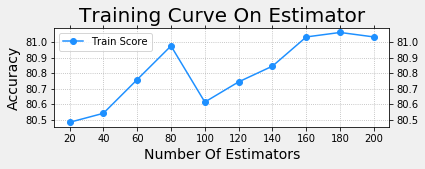

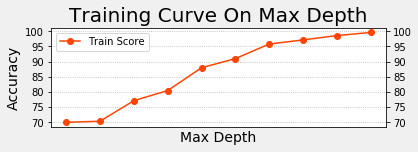

In [25]:
def read_data(filename):
    data = []
    with open(filename,'r') as f:
        for line in f.readlines():
            data.append(line[:-1].split(','))
    # 对字符串做编码
    data = np.array(data).T
    # 为每一个feature建立编码器
    encoders,x = [],[]
    # 此时行表示的是一个feature
    for row in range(len(data)):
        # 建立标签编码器
        encoder = sp.LabelEncoder()
        if row < len(data) -1:
            # 将字符串转化为数字
            x.append(encoder.fit_transform(data[row]))
        else:
            y = encoder.fit_transform(data[row])
        encoders.append(encoder)
    x = np.array(x).T
    # print(encoders)
    # print(set(y))
    return x,y

def train_model_estimator(max_depth):
    model = se.RandomForestClassifier(
        max_depth=max_depth,random_state = 7)
    return model

# 验证曲线
def eval_vc_estimator(model,x,y,n_estimators):
    train_scores,test_scores = \
        ms.validation_curve(model,x,y,'n_estimators',
                       n_estimators,cv=5)
    print(train_scores)
    print(test_scores)
    return train_scores,test_scores


def train_model_max_depth(n_estimators):
    model = se.RandomForestClassifier(
        n_estimators=n_estimators,random_state = 7)
    return model

# 验证曲线
def eval_vc_max_depth(model,x,y,max_depth):
    train_scores,test_scores = \
        ms.validation_curve(model,x,y,'max_depth',
                       max_depth,cv=5)
    print(train_scores)
    print(test_scores)
    return train_scores,test_scores

def init_estimator():
    mp.gcf().set_facecolor(np.ones(3) * 240 / 255)
    mp.subplot(211)
    mp.title('Training Curve On Estimator',fontsize=20)
    mp.xlabel('Number Of Estimators',fontsize=14)
    mp.ylabel('Accuracy',fontsize=14)
    ax = mp.gca()
    ax.xaxis.set_major_locator(mp.MultipleLocator(20))
    ax.yaxis.set_major_locator(mp.MultipleLocator(0.1))
    mp.tick_params(which='both',top=True,right=True,
                  labelright=True,labelsize=10)
    mp.grid(linestyle=':')

def draw_estimator(n_estimators,train_score_estimator):
    # 沿着列的方向求均值
    mp.plot(n_estimators,train_score_estimator.mean(axis=1)*100,
           'o-',c='dodgerblue',label='Train Score')
    mp.legend()
    mp.show()

def init_max_depth():
    mp.gcf().set_facecolor(np.ones(3) * 240 / 255)
    mp.subplot(212)
    mp.title('Training Curve On Max Depth',fontsize=20)
    mp.xlabel('Max Depth',fontsize=14)
    mp.ylabel('Accuracy',fontsize=14)
    ax = mp.gca()
    ax.xaxis.set_major_locator(mp.MultipleLocator(20))
    ax.yaxis.set_major_locator(mp.MultipleLocator(5))
    mp.tick_params(which='both',top=True,right=True,
                  labelright=True,labelsize=10)
    mp.grid(linestyle=':')

def draw_max_depth(max_depth,train_score_max_depth):
    # 沿着列的方向求均值
    mp.plot(max_depth,train_score_max_depth.mean(axis=1)*100,
           'o-',c='orangered',label='Train Score')
    mp.legend()
    mp.show()    
    

# 评估精度，evaluate acurate
def eval_ac(y,pred_y):
    ac = ((y == pred_y).sum() / pred_y.size)
    print('Accuracy:{}%'.format(round(ac * 100, 2)))
    

def main():
    x,y = read_data('car.txt')
    model_estimator = train_model_estimator(4)
    n_estimators = np.linspace(20,200,10).astype(int)
    train_score_estimators,test_scores_estimators = \
        eval_vc_estimator(model_estimator,x,y,n_estimators)
    model_max_depth = train_model_max_depth(20)
    max_depth = np.linspace(1,10,10).astype(int)
    train_score_max_depth,test_scores_max_depth = \
        eval_vc_max_depth(model_max_depth,x,y,max_depth)
    init_estimator()
    draw_estimator(n_estimators,train_score_estimators)
    init_max_depth()
    draw_max_depth(max_depth,train_score_max_depth)
    return 0

if __name__ == '__main__':
    main()